# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Step 1 - Import Python Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')


# import numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Step 2 - Reading and Understanding the data

In [2]:
#read the csv file and check top 5 rows of dataset
pd.set_option('display.max_columns', 500)
bike =pd.read_csv('../input/boom-bikes-sharing-dataset/day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#check the shape of dataframe
bike.shape

(730, 16)

In [4]:
#check the datatype of each column
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#check the statistics of dataframe
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### <u> Analysis-
* #### As seen from above ,dataframe bike has 730 rows and 16 columns with no null values in any column.
* #### Apart from column dteday , all other columns are of data type either int or float

# Step 3 - Data Preparation and Data Visualization.

### Drop unnecessary variables

Based on the high level analysis of the dataset and the data dictionary, the following variables can be removed from further analysis - 

instant : Its just an index variable Hence can be dropped.

dteday : We already have yr ,mnth and weekday as separate columns Hence this column can be dropped.

casual,registered : The 'cnt' variable is the target variable and it is the total number of bike rentals, including both casual and registered.Hence these 2 columns can be dropped since cnt variable already includes both the column values in total.


In [6]:
#Dropping unnecessary columns - 'instant','dteday','casual','registered'

bike.drop(['instant','dteday','casual','registered'],inplace=True,axis=1)
bike.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Converting season, mnth,weathersit and weekday to categorical columns

season: converting season values as 1:Spring, 2:Summer, 3:Fall, 4:Winter

mnth: converting mnth values as 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec

weathersit: converting weathersit values as 1:Clear, 2:bMisty, 3:Light_RainSnow 4:Heavy_RainSnow

weekday: converting weekday values as 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat



In [7]:
bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['mnth']=bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light_RainSnow',4:'Heavy_RainSnow'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})


bike.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Sat,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sun,0,Mist + Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Mon,1,Mist + Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Tue,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Wed,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


### Numerical Variable Analysis

<Figure size 216x216 with 0 Axes>

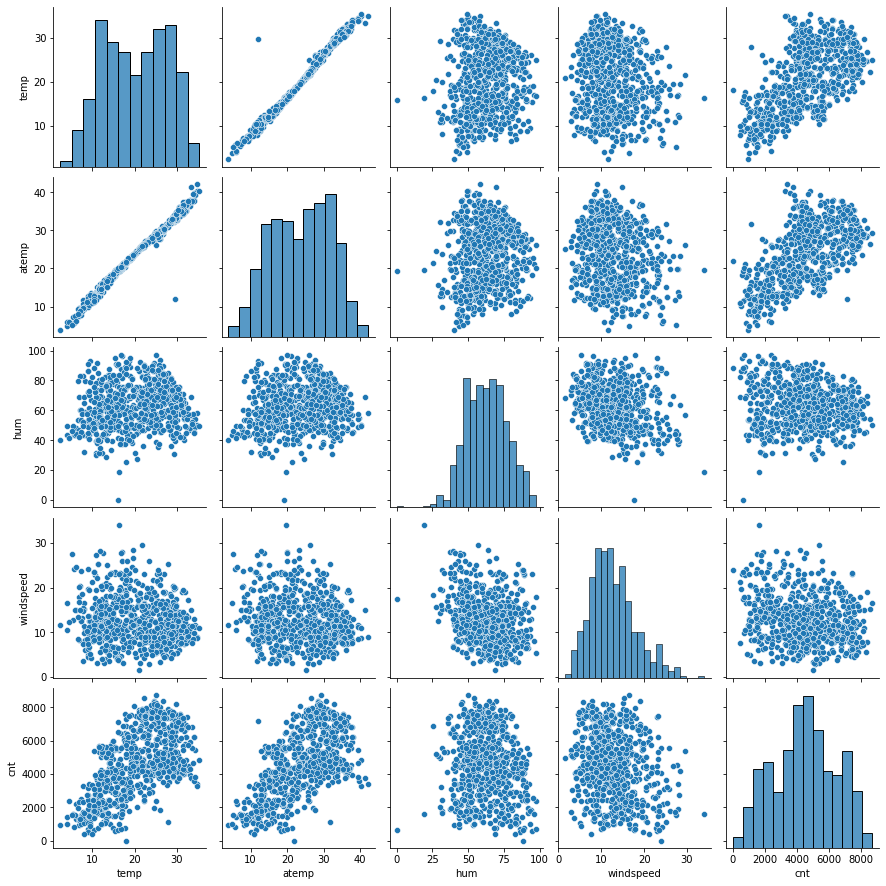

In [8]:
#Generating pairplot to check the relationships between numeric variables 
plt.figure(figsize=(3, 3))
bike_num = bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

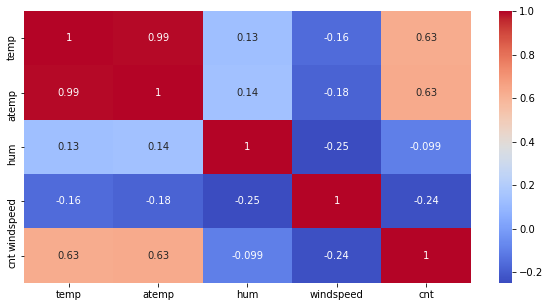

In [9]:
#checking the correlation between numeric variables using heatmap.
plt.figure(figsize = (10, 5))
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="coolwarm")
plt.show()


### <u> Analysis - 
#### There is linear relationship between cnt ,temp and atemp. 

### Categorical Variable Analysis

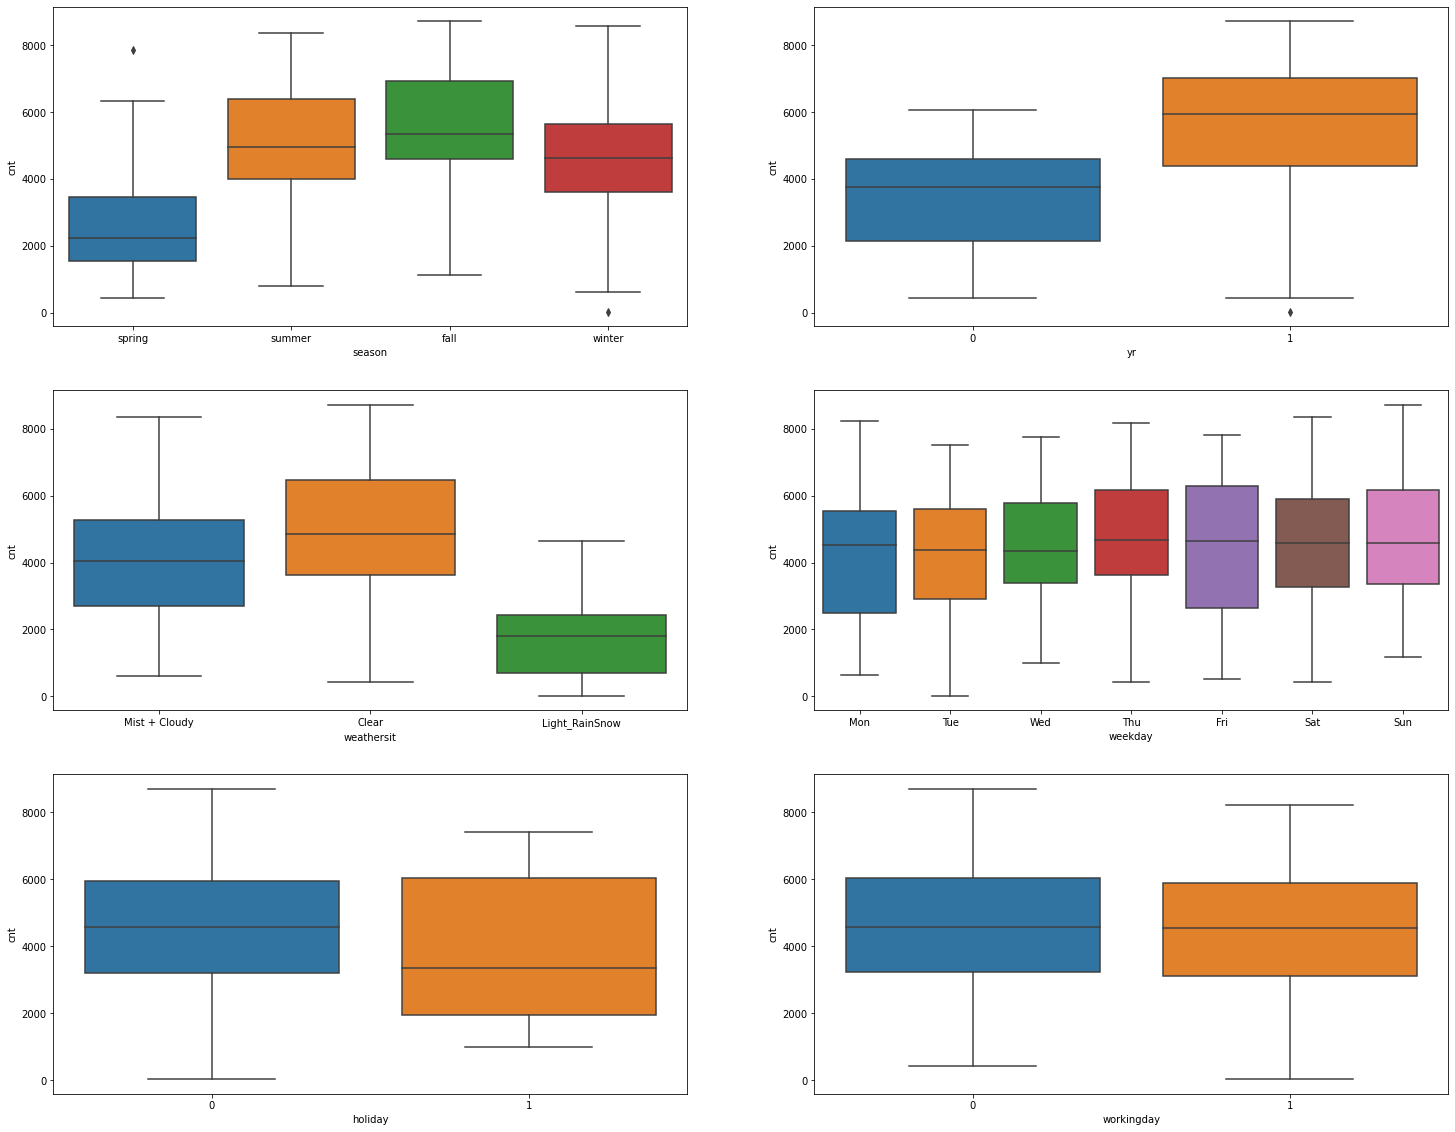

In [10]:
#Boxplot for all categorical variables against the target variable 'cnt'
plt.figure(figsize=(25, 20))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,2,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)

plt.show()

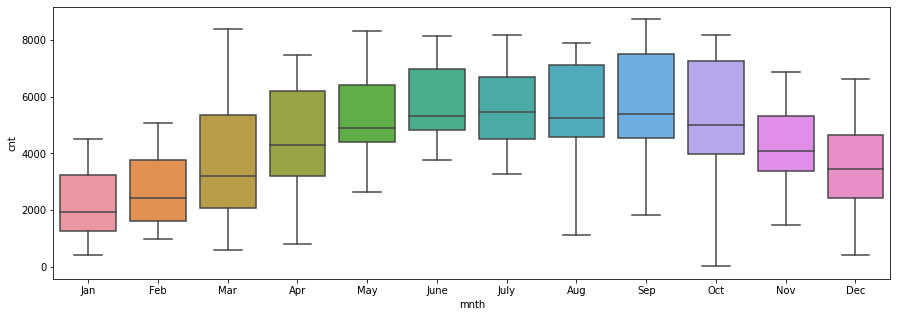

In [11]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.show()

### Analysis-

#### 1. Season - Most of the bike hirings are happening in fall season (median- 5000 booking ) followed by summer & winter.
#### 2. Year - Bike bookings increased considerably from previous year(2018) in next year(2019)
#### 3. Weather -Most of the bike bookings are happening in Clear weather days (median- 5000 booking ) followed by Misty+cloud weather.
#### 4. Weekday -Weekday variable does not show any strong pattern to gain any insights.
#### 5. Holiday- Most of the bike bookings seemed to happen when it is not holiday.
#### 6. Workingday - Bike bookings are more on workingdays than weekend or holidays.
#### 7. month - Bike rentals are increasing from the month may,jun,jul,aug,sept till oct.Highest number of rentals was in the month of Sep and oct while Dec and Jan month had least number of rentals may be due to heavy snow

### Dummy Variables-


In [12]:
# define dummy variable function
def dummies(col,df):
    new_df = pd.get_dummies(df[col], drop_first = True)
    df = pd.concat([df, new_df], axis = 1)
    df.drop([col], axis = 1, inplace = True)
    return df

In [13]:
# Apply the function 
bike = dummies('season',bike)
bike = dummies('mnth',bike)
bike = dummies('weekday',bike)
bike = dummies('weathersit',bike)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_RainSnow,Mist + Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
#check the shape of dataframe
bike.shape

(730, 30)

In [15]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  July            730 non-null    uint8  
 16  June            730 non-null    uint8  
 17  Mar             730 non-null    uin

# Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split. Lets keep 70% of the data in train dataset and the rest 30% in test dataset

In [16]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [17]:
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features

It is important to  rescale the variables so that all the variables are on the same scale . If they are not on same scale, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

There are two common ways of rescaling:

1.Min-Max scaling (Normalisation):Between 0 and 1

Normalisation = (x-xmin)/(xmax-xmin)



2.Standardisation :mean-0, sigma-1

Standardisation= (x-mu)/sig

In [18]:
#Instantiate an object
scaler = MinMaxScaler()

#Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])


In [19]:
#Checking the training dataset(min and max of numeric variables) after rescaling
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_RainSnow,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Analysis - 
#### All the numeric variables are now mapped between 0 and 1

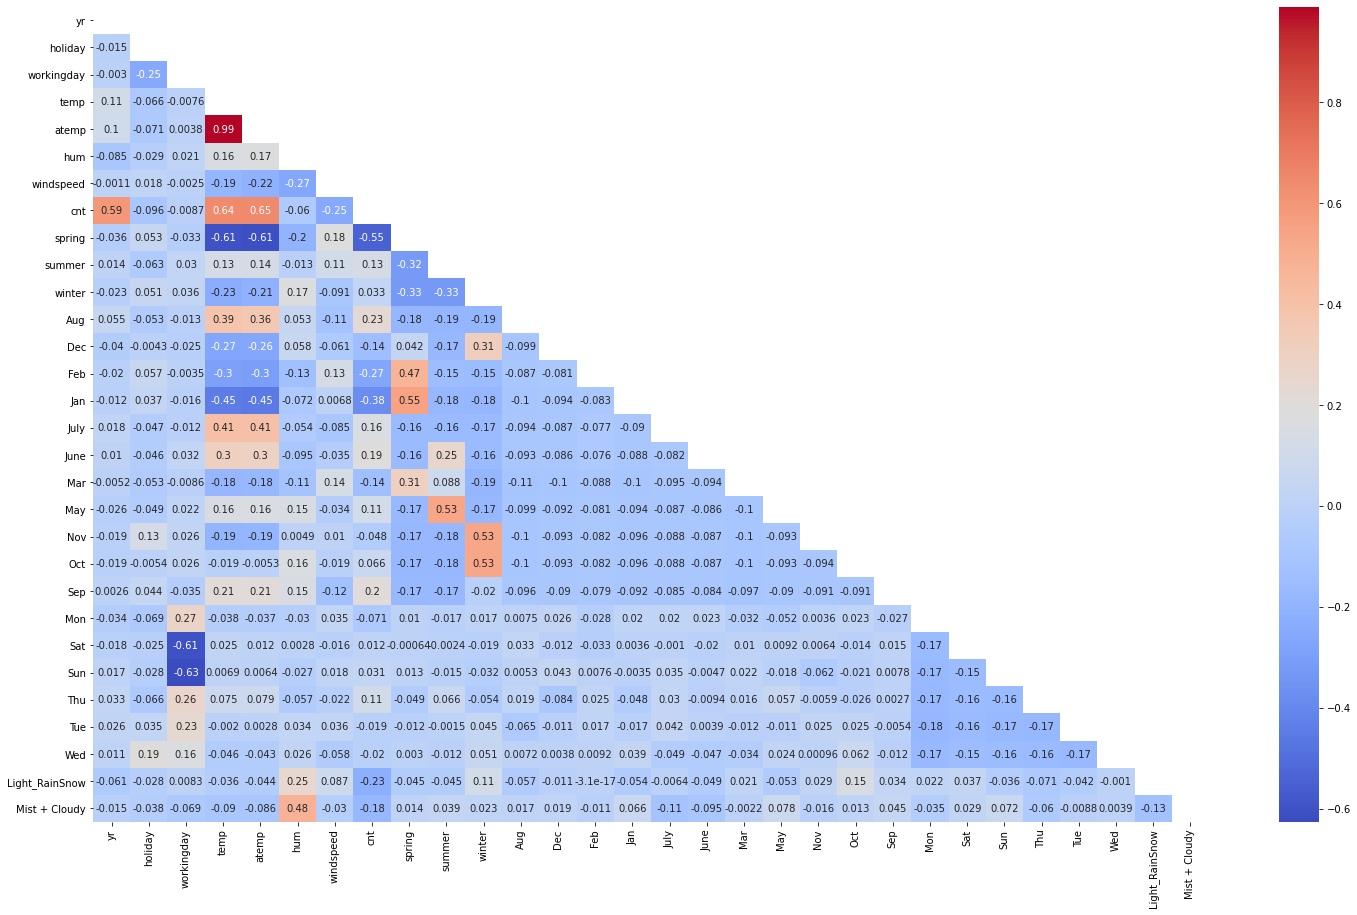

In [20]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 15))
mask = np.zeros_like(bike_train.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(bike_train.corr(),mask=mask, annot = True, cmap="coolwarm")
plt.show()

### Analysis - 

#### 1.temp and atemp variable have a very high correlation around 0.99. Hence, we can use either of these two variables

#### 2.temp,atemp and yr variable has strong correlation with cnt variable.

#### 3.Spring is negative correlated with cnt,temp and atemp variable

#### 4.misty+cloudy weather and humidity has some correlation

#### 5.Different months have some correlation with different weathers and seasons.

#### 6.workingday variable has high negative correlation with Sat & Sun.


### Dividing into X and Y sets for the model building

In [21]:
#Divide the data into X and y
y_train = bike_train.pop('cnt')
X_train = bike_train


# Step 5: Building a linear model


### Feature selection using RFE
Recursive feature elimination automatically select those features in data that contribute most to the prediction variable since having too many irrelevant features in the data can decrease the accuracy of the models

In [22]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15) 
rfe = rfe.fit(X_train, y_train)

In [23]:
#list of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('Light_RainSnow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [24]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col


Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light_RainSnow',
       'Mist + Cloudy'],
      dtype='object')

In [25]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]


Index(['workingday', 'atemp', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [26]:
X_train_rfe = X_train[col]

### <u> MODEL 1

In [27]:
# Adding a constant variable  
X_train_lm1 = sm.add_constant(X_train_rfe)

In [28]:
X_train_lm1.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep',
       'Light_RainSnow', 'Mist + Cloudy'],
      dtype='object')

In [29]:
# Running the linear model 
lm1 = sm.OLS(y_train,X_train_lm1).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 21 Jun 2021   Prob (F-statistic):          3.34e-189
Time:                        10:14:56   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3202      0.036      8.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [30]:
#define function to calculate VIF
def check_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [31]:
#calculate Variance Inflation Factor
check_VIF(X_train_rfe)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,Mist + Cloudy,2.32
0,yr,2.09
11,Nov,1.83
9,Jan,1.75


### Analysis-

#### 'Dec' variable has high p-value among all other variables and Hence can be dropped .

In [32]:
#Drop "Dec" variable
X_train_new1 = X_train_rfe.drop(["Dec"], axis = 1)

### <u> MODEL 2

In [33]:
#Build model#2

# Adding a constant variable  
X_train_lm2 = sm.add_constant(X_train_new1)


# Running the linear model 
lm2 = sm.OLS(y_train,X_train_lm2).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 21 Jun 2021   Prob (F-statistic):          2.25e-189
Time:                        10:14:57   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3030      0.035      8.

In [34]:
#calculate Variance Inflation Factor
check_VIF(X_train_new1)

,Features,VIF
3,hum,29.12
2,temp,16.80
4,windspeed,4.71
5,spring,4.37
7,winter,3.78
6,summer,2.79
13,Mist + Cloudy,2.29
0,yr,2.09
8,Jan,1.67
9,July,1.59


### Analysis-

#### 'Nov' variable has high p value .Hence its insignificant  in presence of other variables and can be dropped .

### <u> MODEL 3

In [35]:
#Drop "Nov" variable
X_train_new2 = X_train_new1.drop(["Nov"], axis = 1)

In [36]:
#Build model#3

# Adding a constant variable  
X_train_lm3 = sm.add_constant(X_train_new2)


# Running the linear model 
lm3 = sm.OLS(y_train,X_train_lm3).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Mon, 21 Jun 2021   Prob (F-statistic):          4.45e-190
Time:                        10:14:59   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2957      0.035      8.

In [37]:
#calculate Variance Inflation Factor
check_VIF(X_train_new2)

,Features,VIF
3,hum,29.05
2,temp,16.70
4,windspeed,4.66
5,spring,4.34
7,winter,3.38
6,summer,2.78
12,Mist + Cloudy,2.28
0,yr,2.09
8,Jan,1.67
9,July,1.59


### Analysis-

#### 'Jan' variable has high p value .Hence its insignificant  in presence of other variables and can be dropped .

In [38]:
#Drop "Jan" variable
X_train_new3 = X_train_new2.drop(["Jan"], axis = 1)

### <u> MODEL 4

In [39]:
#Build model#4

# Adding a constant variable  
X_train_lm4 = sm.add_constant(X_train_new3)


# Running the linear model 
lm4 = sm.OLS(y_train,X_train_lm4).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 21 Jun 2021   Prob (F-statistic):          1.69e-190
Time:                        10:15:00   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2841      0.034      8.

In [40]:
#calculate Variance Inflation Factor
check_VIF(X_train_new3)

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,spring,4.01
7,winter,3.35
6,summer,2.78
11,Mist + Cloudy,2.28
0,yr,2.08
8,July,1.58
9,Sep,1.38


### Analysis-

#### 'hum' variable has high VIF value .Hence can be dropped .

In [41]:
#Drop "hum" variable
X_train_new4 = X_train_new3.drop(["hum"], axis = 1)

### <u> MODEL 5

In [42]:
#Build model#5

# Adding a constant variable  
X_train_lm5 = sm.add_constant(X_train_new4)


# Running the linear model 
lm5 = sm.OLS(y_train,X_train_lm5).fit()

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 21 Jun 2021   Prob (F-statistic):          2.40e-187
Time:                        10:15:01   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1996      0.030      6.

In [43]:
#calculate Variance Inflation Factor
check_VIF(X_train_new4)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
7,July,1.58
10,Mist + Cloudy,1.55
8,Sep,1.34
9,Light_RainSnow,1.08


### Analysis-

#### 'temp' variable has high VIF value but it also has strong correlation with cnt variable. Lets drop 'temp' and check the model

In [44]:
#drop "temp" variable
X_train_new5 = X_train_new4.drop(["temp"], axis = 1)

### <u> MODEL 6

In [45]:
#Build model#6

# Adding a constant variable  
X_train_lm6 = sm.add_constant(X_train_new5)


# Running the linear model 
lm6 = sm.OLS(y_train,X_train_lm6).fit()

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.1
Date:                Mon, 21 Jun 2021   Prob (F-statistic):          3.17e-149
Time:                        10:15:02   Log-Likelihood:                 406.24
No. Observations:                 510   AIC:                            -790.5
Df Residuals:                     499   BIC:                            -743.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5843      0.017     34.

In [46]:
#calculate Variance Inflation Factor
check_VIF(X_train_new5)

,Features,VIF
2,windspeed,3.81
3,spring,2.07
4,summer,2.00
0,yr,1.83
5,winter,1.74
9,Mist + Cloudy,1.51
6,July,1.19
7,Sep,1.16
8,Light_RainSnow,1.08
1,holiday,1.04


### Analysis-

#### As seen from above , on dropping 'temp' variable Adjusted R-squared value dropped from 83.2% to 75.9%.Hence we will retain "temp" variable and drop "July" variable which has high p value compared to other variables.

In [47]:
#Drop "july" variable
X_train_new6 = X_train_new4.drop(["July"], axis = 1)

### <u> MODEL 7

In [48]:
#Build model#7

# Adding a constant variable  
X_train_lm7 = sm.add_constant(X_train_new6)


# Running the linear model 
lm7 = sm.OLS(y_train,X_train_lm7).fit()

print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 21 Jun 2021   Prob (F-statistic):          7.36e-187
Time:                        10:15:03   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1910      0.030      6.

In [49]:
#calculate Variance Inflation Factor
check_VIF(X_train_new6)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.89
6,winter,1.63
9,Mist + Cloudy,1.54
7,Sep,1.23
8,Light_RainSnow,1.08
1,holiday,1.04


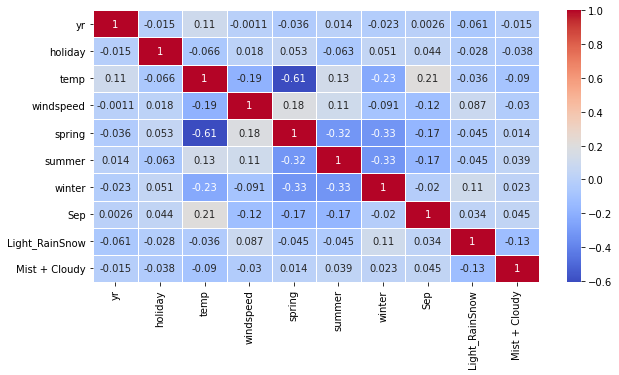

In [50]:
#validate multi-collinearity among predictor variables
plt.figure(figsize=(10,5))
sns.heatmap(X_train_new6.corr(),annot = True, cmap="coolwarm",linewidth =1)
plt.show()

### Analysis-

#### 1.  This Model looks good with R-squared- 83.3% and  Adj. R-squared- 83.3%
#### 2.  All predictor variables have VIF less than 5 
#### 3.  There is very low multi-collinearity between predictor variables.
#### 4.  Prob (F-statistic) almost equal to 0 and F-Statistics value is 249 indicating overall model is statistically significant, and the explained variance isn't purely by chance.
#### 5.  p-value of all predictor variables are equal to 0.
#### 6.  All the coefficients are not equal to zero and p-value is less than 0.05 Hence we REJECT the NULL HYPOTHESIS


### Lets move with the model 7 as our final model

# Step 6: Model validation

Validating the assumption of Linear Regression Model :

### 6.1 Linearity

The relationship between the independent and dependent variables is linear. This can be checked by scatter ploting Actual value Vs Predicted value

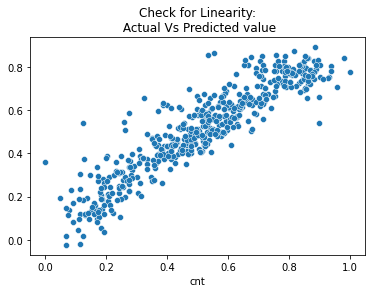

In [51]:
y_train_pred = lm7.predict(X_train_lm7)
sns.scatterplot(y_train,y_train_pred)
plt.title('Check for Linearity:\n Actual Vs Predicted value')
plt.show()

### Analysis-

#### As seen from above , the actual vs predicted plot is linear 

### 6.2 Mean of Residuals

One of the assumptions of linear regression is that the mean of the residuals should be zero.

In [52]:
res = y_train - y_train_pred
mean_res = np.mean(res)
print("Mean of Residuals {}".format(mean_res))

Mean of Residuals -6.524192950591362e-16


### Analysis-

#### As seen from above , Mean of residual is almost zero.

### 6.3 Homoscedasticity

Homoscedasticity means that the residuals have constant variance across the regression line. 

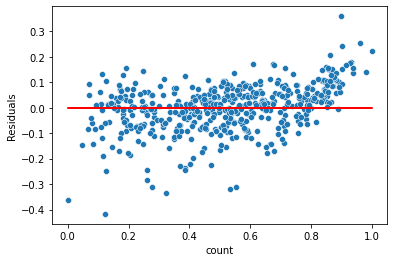

In [53]:
sns.scatterplot(y_train,res)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('count')
plt.ylabel('Residuals')
plt.show()

### Analysis-

#### There is no visible pattern in residual values

### 6.4 Normality of Error terms

check if the error terms are normally distributed which is one of the major assumptions of linear regression.

<Figure size 432x288 with 0 Axes>

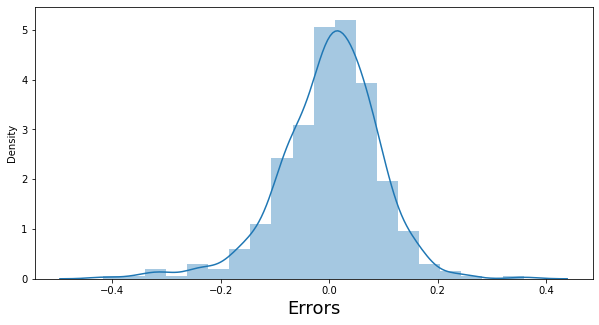

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize=(10,5))

sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)   
plt.show()

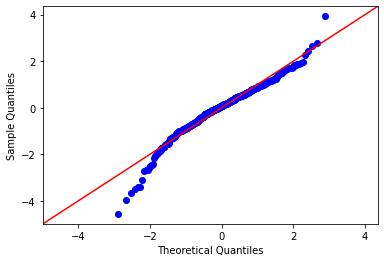

In [55]:
#check using qq-plot
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

### Analysis-

#### The residuals are normally distributed with a mean 0

### 6.5 Auto-Correlation of residuals.

When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.
In time series data, there could be information about the past that is not captured. In a non-time series scenario, our model could be systematically biased by either under or over predicting in certain conditions. It could also be a result of a violation of the linearity assumption

To ensure the absence of autocorrelation we use Ljungbox test.
 * Null Hypothesis: Autocorrelation is absent.
 * Alternative Hypothesis: Autocorrelation is present.

In [56]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(res , lags = 40)[1])

0.35320866180564114

#### Since p value is less than 0.05 we fail to reject the null hypothesis that autocorrelation is absent

### 6.6 Absence of Multicolinearity

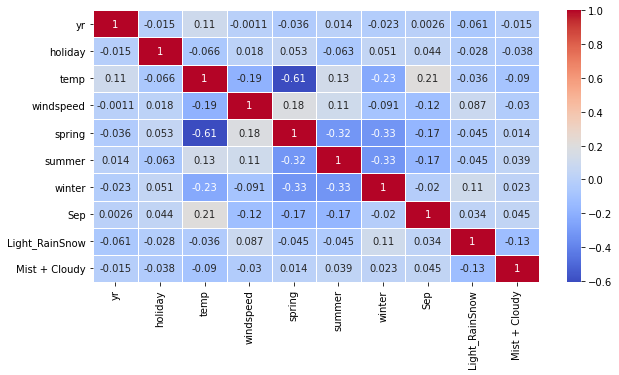

In [57]:
#validate multi-collinearity among predictor variables
plt.figure(figsize=(10,5))
sns.heatmap(X_train_new6.corr(),annot = True, cmap="coolwarm",linewidth =1)
plt.show()

### Analysis-

#### There is insignificant multicolinearity among the predictor variables.

# Step 7: Making Predictions using final model

In [58]:
#Scaling the test set
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_RainSnow,Mist + Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [59]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_RainSnow,Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
#Dividing into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test

In [61]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test = X_test[X_train_new6.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test)

In [62]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           219 non-null    float64
 1   yr              219 non-null    int64  
 2   holiday         219 non-null    int64  
 3   temp            219 non-null    float64
 4   windspeed       219 non-null    float64
 5   spring          219 non-null    uint8  
 6   summer          219 non-null    uint8  
 7   winter          219 non-null    uint8  
 8   Sep             219 non-null    uint8  
 9   Light_RainSnow  219 non-null    uint8  
 10  Mist + Cloudy   219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [63]:
# Making predictions
y_pred = lm7.predict(X_test_new)

# Step 8 : Model Evaluation

Text(0, 0.5, 'y_pred')

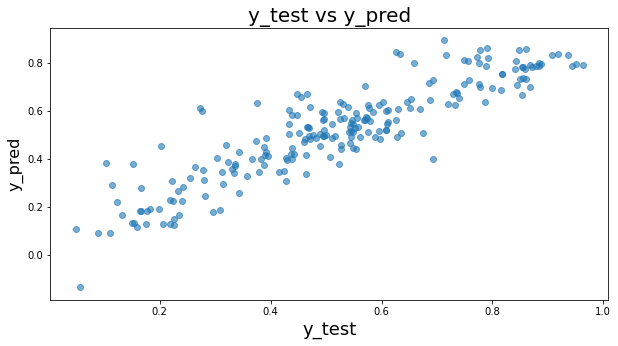

In [64]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred,alpha = 0.6)
plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

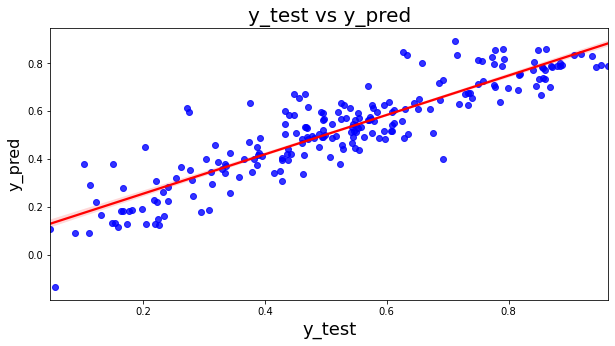

In [65]:
#Regression plot
plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [66]:
r2=r2_score(y_test, y_pred)
print('The R-Squared score of the model for the predicted values is',round(r2,4))
print('The Root Mean Squared Error of the model for the predicted values is',round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
print('The Mean Absolute Error of the model for the predicted values is',mean_absolute_error(y_test, y_pred))

The R-Squared score of the model for the predicted values is 0.8035
The Root Mean Squared Error of the model for the predicted values is 0.0966
The Mean Absolute Error of the model for the predicted values is 0.07321970598415253


In [67]:
#n is number of rows in test dataset
n = X_test.shape[0]

# Number of predictor(shape along axis 1)
p = X_test.shape[1]

#Calculate the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
print("The Adjusted R-Squared score of the model for the predicted values is",adjusted_r2)

The Adjusted R-Squared score of the model for the predicted values is 0.7941


In [68]:
lm7.params

const             0.190994
yr                0.234060
holiday          -0.096865
temp              0.478177
windspeed        -0.148155
spring           -0.055092
summer            0.060987
winter            0.095929
Sep               0.090932
Light_RainSnow   -0.286002
Mist + Cloudy    -0.080124
dtype: float64

### Equation of the best fitted line is:

### cnt = 0.1910 + (0.2341 x yr) - (0.0969 x holiday) + (0.4782 x temp) - (0.1482 x windspeed) - (0.0551 x spring) + (0.0610 x summer) + (0.0959 x winter) + (0.0909 x sep) - (0.2860 x Light_RainSnow) - (0.0801 x Mist + Cloudy)

### Interpretation of coefficients :

1.const : if all other predictor variables equal to 0 (i.e. when x1,x2...xn =0), bike rental increase by 0.1910 units.

2.yr : A unit increase in yr variable, increases the bike hire numbers by 0.2341 units.

3.holiday : A unit increase in holiday variable, decreases the bike hire numbers by 0.0969 units.

4.temp : A unit increase in temp variable, increases the bike hire numbers by 0.4782 units.

5.windspeed : A unit increase in windspeed variable, decreases the bike hire numbers by 0.1482 units

6.spring : A unit increase in spring variable, decreases the bike hire numbers by 0.0551 units

7.summer : A unit increase in summer variable , increases the bike hire numbers by 0.0610 units.

8.winter : A unit increase in winter variable , increases the bike hire numbers by 0.0959 units.

9.sept : A unit increase in sept variable , increases the bike hire numbers by 0.0909 units.

10.Light_RainSnow : A unit increase in Light_RainSnow variable , decreases the bike hire numbers by 0.2860 units.

11.Mist + Cloudy : A unit increase in Mist + Cloudy variable , decreases the bike hire numbers by 0.0801 units

### <u> As per the final model, Company should focus on following variables:

#### 1) temp (Coefficient value: 0.4782)
Temperature plays an important role in bike rental and as observed from scatterplot , there is a increase in bike rentals in moderate temperature(above 20 degree celsius) days 


    
#### 2) yr (Coefficient value: 0.2341)
Bike Rentals increases with each passing year.Demand for bikes rental increased in year 2019 compared to 2018.But due to ongoing corona pandemic , they might see a dip this year .After lockdown ends , there will be increase in ridership because people are staying home and more available and will seek more ways to get out and ride


    
#### 3) Light_RainSnow(Coefficient value: -0.2860) & windspeed(Coefficient value: -0.1482) & holidays(Coefficient value: -0.0969) & spring (Coefficient value : -0.0551)  
There is decrease in bike rentals during light snow and rain,windy days,spring season and holidays.Company should expect low bike hiring rate in these days.Company should focus more on working days and give promotional offers to increase the demands on holidays,spring season and light snowy days.


    
#### 4) winter(Coefficient value: 0.0959) & sept(Coefficient value: 0.0909) & summer (Coefficient value: 0.0610) 
There is increase in bike rentals in winter season till start of the fall season(sept month). Also people prefer bike rentals in summer season.Company should increase their business during these seasons.

    
    
    

###  Bike rental business is very seasonal in nature Hence it is recommended that company should expand their business during moderate temperature and pleasant weather days . Company can organize a Bike Marathon or bike Race to increase business growth during these days